In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Path to Cropped Microbes (Stored in Google Drive)
train_path = '/content/drive/MyDrive/Cropped_Microbes/train'
test_path = '/content/drive/MyDrive/Cropped_Microbes/test'

# Image dimensions
IMG_SIZE = (224, 224)
BATCH_SIZE = 16

In [ ]:

datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80-20 train-validation split
)
test_datagen = ImageDataGenerator(rescale=1.0/255)
train_data = datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)
test_data = test_datagen.flow_from_directory(
    test_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Print class labels
print("Class Mapping: ", train_data.class_indices)

Found 748 images belonging to 8 classes.
Found 182 images belonging to 8 classes.
Found 133 images belonging to 8 classes.
Class Mapping:  {'Amoeba': 0, 'Microalgae': 1, 'Nematode': 2, 'Rod bacteria': 3, 'Rotifer': 4, 'Spherical bacteria': 5, 'Spiral bacteria': 6, 'Yeast': 7}


In [ ]:
num_classes = len(train_data.class_indices)

# Without Dropout , 4 conv blocks


In [ ]:
from tensorflow.keras import layers, models
from tensorflow import keras
#NO dropout
# Number of classes
num_classes = 8  # Update this if different

def build_custom_cnn(input_shape=(224, 224, 3), num_classes=num_classes):
    model = models.Sequential()

    # Conv Block 1
    model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))

    # Conv Block 2
    model.add(layers.Conv2D(128, (3,3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))

    # Conv Block 3
    model.add(layers.Conv2D(256, (3,3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))

    # Conv Block 4
    model.add(layers.Conv2D(512, (3,3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))

    # Global Average Pooling
    model.add(layers.GlobalAveragePooling2D())

    # Fully Connected Layers
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile the Model
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

    return model

# Build and summarize
model = build_custom_cnn()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │           4,104 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,821,576 (6.95 MB)

 Trainable params: 1,819,656 (6.94 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [ ]:
# Training Configuration
EPOCHS = 30

# Train the Model
history = model.fit(
    train_data,
    epochs=EPOCHS,
    validation_data=val_data
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 549s 11s/step - accuracy: 0.4512 - loss: 1.6542 - val_accuracy: 0.2692 - val_loss: 2.0134
Epoch 2/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 339ms/step - accuracy: 0.5923 - loss: 1.1437 - val_accuracy: 0.2692 - val_loss: 2.2665
Epoch 3/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 449ms/step - accuracy: 0.6535 - loss: 0.9502 - val_accuracy: 0.2692 - val_loss: 2.8027
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 397ms/step - accuracy: 0.6859 - loss: 0.9191 - val_accuracy: 0.2692 - val_loss: 4.0998
Epoch 5/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 342ms/step - accuracy: 0.7526 - loss: 0.7130 - val_accuracy: 0.2692 - val_loss: 4.4259
Epoch 6/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 342ms/step - accuracy: 0.7469 - loss: 0.6714 - val_accuracy: 0.2692 - val_loss: 4.9429
Epoch 7/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 343ms/step - accuracy: 0.7878 - loss: 0.6449 - val_accuracy: 0.2692 - val_loss: 4.8886
Epoch 8/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 391ms/step - accuracy: 0.7648 - loss: 0.6376 - val_accur

In [ ]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


9/9 ━━━━━━━━━━━━━━━━━━━━ 82s 10s/step - accuracy: 0.8864 - loss: 0.5734
Test Accuracy: 85.71%


In [ ]:
import numpy as np

# Get predictions
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class labels

# Get true labels
true_classes = test_data.classes

# Print results
print(f"Predicted Classes: {predicted_classes}")
print(f"True Classes: {true_classes}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step
Predicted Classes: [0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6 1 2
 2 2 2 2 2 2 1 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 0 4 4 4 4 4 4 7 4 2 4 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 0 1 6
 6 6 6 1 1 1 1 6 6 7 7 7 7 7 7 7 7 0 7 7 7 7]
True Classes: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6
 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7]


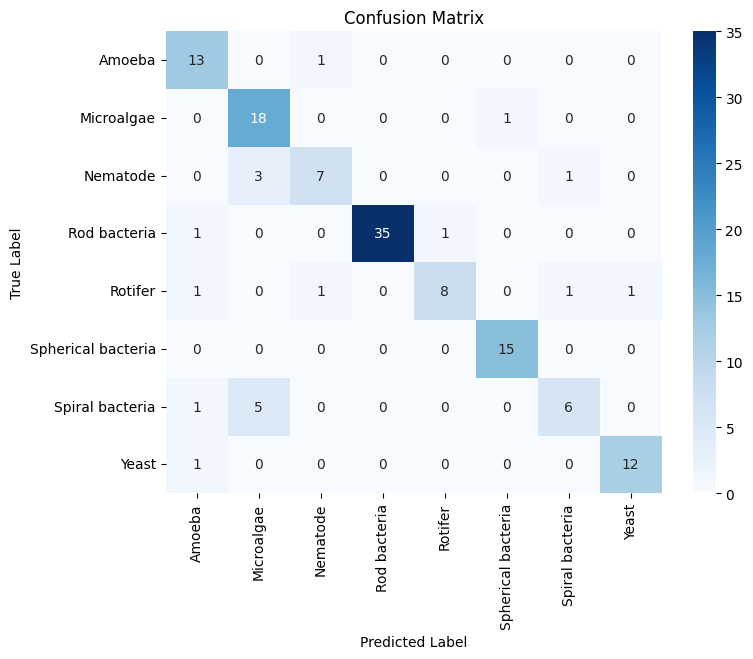

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_data.class_indices, yticklabels=test_data.class_indices)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(true_classes, predicted_classes, target_names=test_data.class_indices.keys())

# Print report
print(report)

                    precision    recall  f1-score   support

            Amoeba       0.76      0.93      0.84        14
        Microalgae       0.69      0.95      0.80        19
          Nematode       0.78      0.64      0.70        11
      Rod bacteria       1.00      0.95      0.97        37
           Rotifer       0.89      0.67      0.76        12
Spherical bacteria       0.94      1.00      0.97        15
   Spiral bacteria       0.75      0.50      0.60        12
             Yeast       0.92      0.92      0.92        13

          accuracy                           0.86       133
         macro avg       0.84      0.82      0.82       133
      weighted avg       0.87      0.86      0.85       133



# With Dropout

In [ ]:
# Custom CNN Model
def build_custom_cnn(input_shape=(224, 224, 3), num_classes=num_classes):
    model = models.Sequential()

    # Conv Block 1
    model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))

    # Conv Block 2
    model.add(layers.Conv2D(128, (3,3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))

    # Conv Block 3
    model.add(layers.Conv2D(256, (3,3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.4))

    # Conv Block 4
    model.add(layers.Conv2D(512, (3,3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.4))

    # Global Average Pooling
    model.add(layers.GlobalAveragePooling2D())

    # Fully Connected Layers
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile the Model
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

    return model

# Initialize and Summarize
model = build_custom_cnn()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)                   │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 222, 222, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 109, 109, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 109, 109, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 54, 54, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 52, 52, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 52, 52, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 26, 26, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 26, 26, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 24, 24, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 24, 24, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 8)                   │           4,104 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,821,576 (6.95 MB)

 Trainable params: 1,819,656 (6.94 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [ ]:
# Training Configuration
EPOCHS = 30

# Train the Model
history = model.fit(
    train_data,
    epochs=EPOCHS,
    validation_data=val_data
)

Epoch 1/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 374ms/step - accuracy: 0.7981 - loss: 0.5316 - val_accuracy: 0.5604 - val_loss: 1.5134
Epoch 2/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 343ms/step - accuracy: 0.8024 - loss: 0.5670 - val_accuracy: 0.5824 - val_loss: 1.3593
Epoch 3/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 402ms/step - accuracy: 0.8364 - loss: 0.4785 - val_accuracy: 0.6044 - val_loss: 1.3418
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 365ms/step - accuracy: 0.8223 - loss: 0.5025 - val_accuracy: 0.5879 - val_loss: 1.3737
Epoch 5/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 348ms/step - accuracy: 0.8335 - loss: 0.4947 - val_accuracy: 0.5549 - val_loss: 1.4459
Epoch 6/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 343ms/step - accuracy: 0.8397 - loss: 0.4473 - val_accuracy: 0.5934 - val_loss: 1.4266
Epoch 7/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 379ms/step - accuracy: 0.8461 - loss: 0.4655 - val_accuracy: 0.5659 - val_loss: 1.5722
Epoch 8/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 340ms/step - accuracy: 0.8678 - loss: 0.4379 - val_accu

In [ ]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.7194 - loss: 0.9234
Test Accuracy: 75.19%


In [ ]:
import numpy as np

# Get predictions
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class labels

# Get true labels
true_classes = test_data.classes

# Print results
print(f"Predicted Classes: {predicted_classes}")
print(f"True Classes: {true_classes}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step
Predicted Classes: [2 0 6 0 0 0 3 0 3 0 2 0 0 0 6 6 6 5 6 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 6 1 2
 2 2 2 2 2 2 1 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 4 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 6 4 4 1 4 4 4 6 6 4 4 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 0 6 6
 1 4 6 2 1 4 4 6 6 7 2 2 7 7 7 7 0 7 7 7 7 7]
True Classes: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6
 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7]


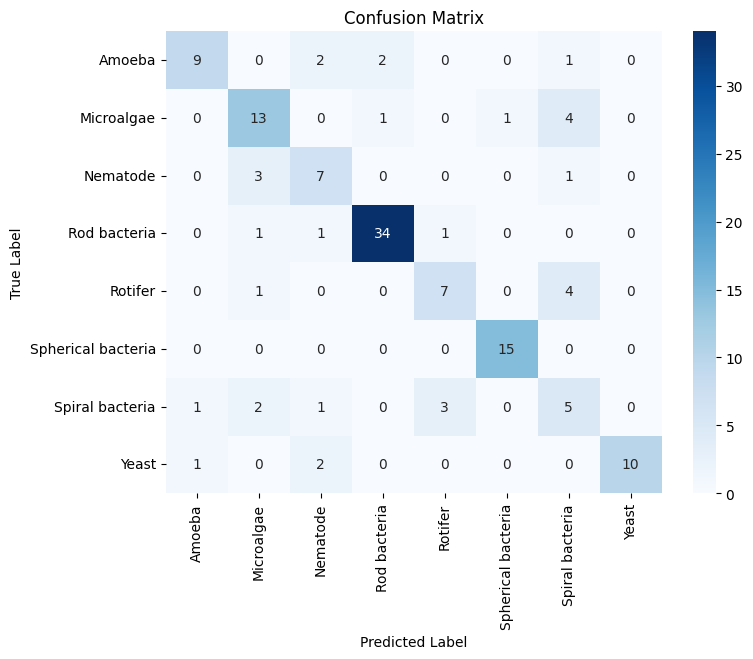

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_data.class_indices, yticklabels=test_data.class_indices)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(true_classes, predicted_classes, target_names=test_data.class_indices.keys())

# Print report
print(report)

                    precision    recall  f1-score   support

            Amoeba       0.82      0.64      0.72        14
        Microalgae       0.65      0.68      0.67        19
          Nematode       0.54      0.64      0.58        11
      Rod bacteria       0.92      0.92      0.92        37
           Rotifer       0.64      0.58      0.61        12
Spherical bacteria       0.94      1.00      0.97        15
   Spiral bacteria       0.33      0.42      0.37        12
             Yeast       1.00      0.77      0.87        13

          accuracy                           0.75       133
         macro avg       0.73      0.71      0.71       133
      weighted avg       0.77      0.75      0.76       133



# With attention mech

In [ ]:
from tensorflow.keras import models, layers, regularizers
from tensorflow import keras

def build_cnn_without_residual(input_shape=(224, 224, 3), num_classes=num_classes):
    inputs = layers.Input(shape=input_shape)

    # Initial Conv Block with larger filters
    x = layers.Conv2D(64, (7, 7), strides=2, padding='same', activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((3, 3), strides=2, padding='same')(x)

    # Conv Block 1
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)

    # Conv Block 2 with attention
    x = layers.Conv2D(128, (3, 3), strides=2, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Squeeze-and-Excitation attention
    se = layers.GlobalAveragePooling2D()(x)
    se = layers.Dense(8, activation='relu')(se)
    se = layers.Dense(128, activation='sigmoid')(se)
    se = layers.Reshape((1, 1, 128))(se)  # Match dimensions for multiplication
    x = layers.multiply([x, se])

    # Conv Block 3
    x = layers.Conv2D(256, (3, 3), strides=2, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    # Conv Block 4 with dilation
    x = layers.Conv2D(512, (3, 3), dilation_rate=2, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.4)(x)

    # Final feature extraction
    x = layers.Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.GlobalAveragePooling2D()(x)

    # Dense layers with regularization
    x = layers.Dense(1024, activation='relu',
                     kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)

    x = layers.Dense(512, activation='relu',
                     kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)

    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=inputs, outputs=outputs)

    # Compile the model
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Initialize and summarize the model
model = build_cnn_without_residual()
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 112, 112, 64)   │          9,472 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 112, 112, 64)   │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 56, 56, 64)     │              0 │ batch_normalization[0… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 56, 56, 64)     │         36,928 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 56, 56, 64)     │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 56, 56, 64)     │         36,928 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 56, 56, 64)     │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 28, 28, 128)    │         73,856 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 28, 28, 128)    │            512 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 14, 14, 128)    │              0 │ batch_normalization_3… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d  │ (None, 128)            │              0 │ max_pooling2d_1[0][0]  │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 8)              │          1,032 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 128)            │          1,152 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 1, 1, 128)      │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply (Multiply)       │ (None, 14, 14, 128)    │              0 │ max_pooling2d_1[0][0], │
│                      

 Total params: 5,652,368 (21.56 MB)

 Trainable params: 5,645,584 (21.54 MB)

 Non-trainable params: 6,784 (26.50 KB)

In [ ]:
# Training Configuration
EPOCHS = 30

# Train the Model
history = model.fit(
    train_data,
    epochs=EPOCHS,
    validation_data=val_data
)

Epoch 1/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 342ms/step - accuracy: 0.6372 - loss: 10.6678 - val_accuracy: 0.5714 - val_loss: 10.9980
Epoch 2/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 320ms/step - accuracy: 0.6527 - loss: 10.5343 - val_accuracy: 0.5495 - val_loss: 11.0153
Epoch 3/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 322ms/step - accuracy: 0.6804 - loss: 10.4380 - val_accuracy: 0.5330 - val_loss: 10.6017
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 326ms/step - accuracy: 0.6902 - loss: 10.1395 - val_accuracy: 0.5659 - val_loss: 10.7739
Epoch 5/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 320ms/step - accuracy: 0.6547 - loss: 10.0760 - val_accuracy: 0.4176 - val_loss: 10.7149
Epoch 6/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 376ms/step - accuracy: 0.7155 - loss: 9.8332 - val_accuracy: 0.5330 - val_loss: 10.4477
Epoch 7/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 320ms/step - accuracy: 0.6545 - loss: 9.8770 - val_accuracy: 0.5440 - val_loss: 10.5358
Epoch 8/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 323ms/step - accuracy: 0.7122 - loss: 9.534

In [ ]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.6104 - loss: 7.1593 
Test Accuracy: 66.92%


In [ ]:
import numpy as np

# Get predictions
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class labels

# Get true labels
true_classes = test_data.classes

# Print results
print(f"Predicted Classes: {predicted_classes}")
print(f"True Classes: {true_classes}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 259ms/step
Predicted Classes: [2 0 4 0 0 0 7 0 4 4 2 2 2 2 1 1 1 2 2 0 0 0 0 1 0 1 1 1 1 1 1 2 2 4 2 2 2
 2 2 1 2 2 2 4 3 3 1 3 4 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 2 7 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 0 4 4 1 4 4 4 7 4 2 0 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 0 0 4
 6 0 2 2 4 4 4 2 0 7 7 7 7 7 7 7 7 0 7 7 7 7]
True Classes: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6
 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7]


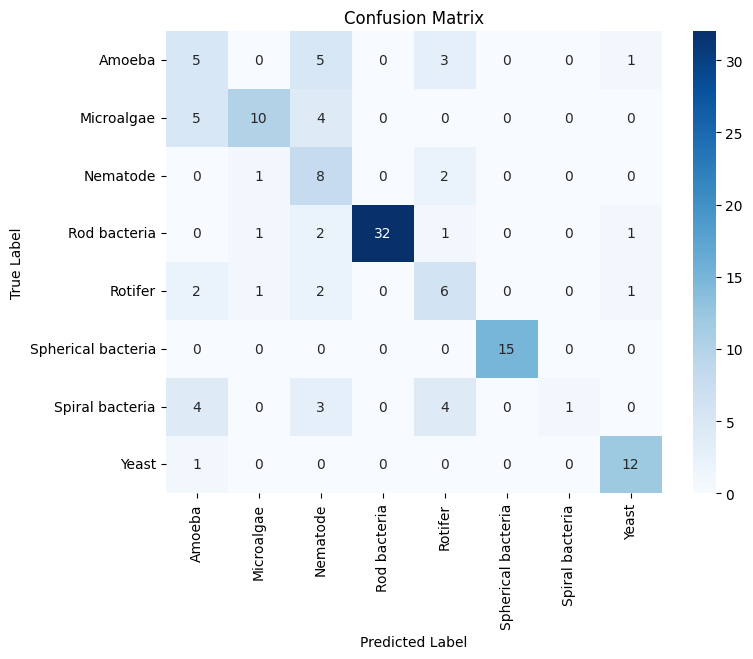

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_data.class_indices, yticklabels=test_data.class_indices)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(true_classes, predicted_classes, target_names=test_data.class_indices.keys())

# Print report
print(report)

                    precision    recall  f1-score   support

            Amoeba       0.29      0.36      0.32        14
        Microalgae       0.77      0.53      0.62        19
          Nematode       0.33      0.73      0.46        11
      Rod bacteria       1.00      0.86      0.93        37
           Rotifer       0.38      0.50      0.43        12
Spherical bacteria       1.00      1.00      1.00        15
   Spiral bacteria       1.00      0.08      0.15        12
             Yeast       0.80      0.92      0.86        13

          accuracy                           0.67       133
         macro avg       0.70      0.62      0.60       133
      weighted avg       0.76      0.67      0.67       133

